<div style="background:#1565c0; color:#ffffff; padding:14px 18px; border-radius:10px; margin-bottom:12px;">
  <h2 style="margin:0 0 6px 0;">🏢 Salifort Motors Employee Turnover Predictor</h2>
  <p style="margin:0 0 6px 0; font-size:14px;">
    Predicts whether an employee is <strong>likely to leave (1)</strong> or <strong>stay (0)</strong>, enabling HR teams to identify at–risk staff and improve retention strategies.
  </p>
  <p style="margin:0; font-size:12px; opacity:0.95;">
    <strong>Focus:</strong> Recall–first prediction for early risk detection 
    • <strong>Tech:</strong> Python, pandas, scikit-learn, XGBoost 
    • <strong>Data:</strong> HR records & performance indicators
  </p>
</div>

Salifort Motors, a fictional car manufacturing company, has observed a growing concern with employee turnover. This project aims to identify key drivers of employee attrition using data-driven methods and build predictive models to anticipate which employees are most at risk of leaving. The results will help HR department and management design more effective retention strategies.

# **PACE stages**


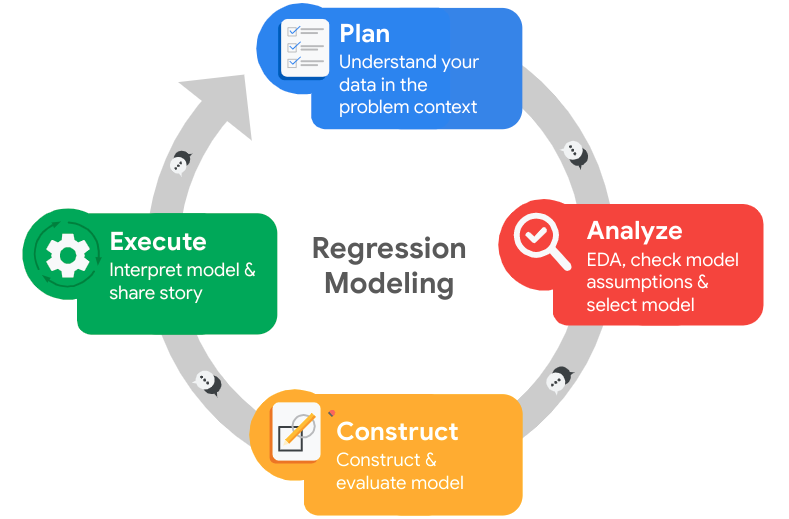

## **Pace: Plan**

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. The goals of this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If this project can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### **The Salifort Motors HR dataset**

The dataset that for this project contains 15,000 rows and 10 columns for the variables listed below. 

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### Import packages

In [141]:
# Import packages

# Basic data analysis
import numpy as np
import pandas as pd
import pickle

# Statistical analysis
from scipy import stats
import statsmodels.api as sm

# Modeling
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import precision_score, recall_score, accuracy_score,\
    f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report,\
        auc, roc_curve, RocCurveDisplay
import xgboost
from xgboost import XGBClassifier

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance
import shap

In [ ]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_salifort_dataset.csv")

# Display first few rows of the dataframe
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Gather basic information about the data

In [3]:
# Gather basic information about the data

df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data

df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names

df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [8]:
# Rename columns as needed
df0.columns = df0.columns.str.lower()

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [9]:
# Check for missing values

df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

In [11]:
# Check for duplicates

df0.duplicated().sum()

np.int64(3008)

In [13]:
# Inspect some rows containing duplicates as needed

duplicates = df0[df0.duplicated(keep='first')]
duplicates

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [15]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates()

# Confirm duplicates dropping
df1.shape

(11991, 10)

### Check outliers

In [16]:
df1.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<Figure size 1200x600 with 0 Axes>

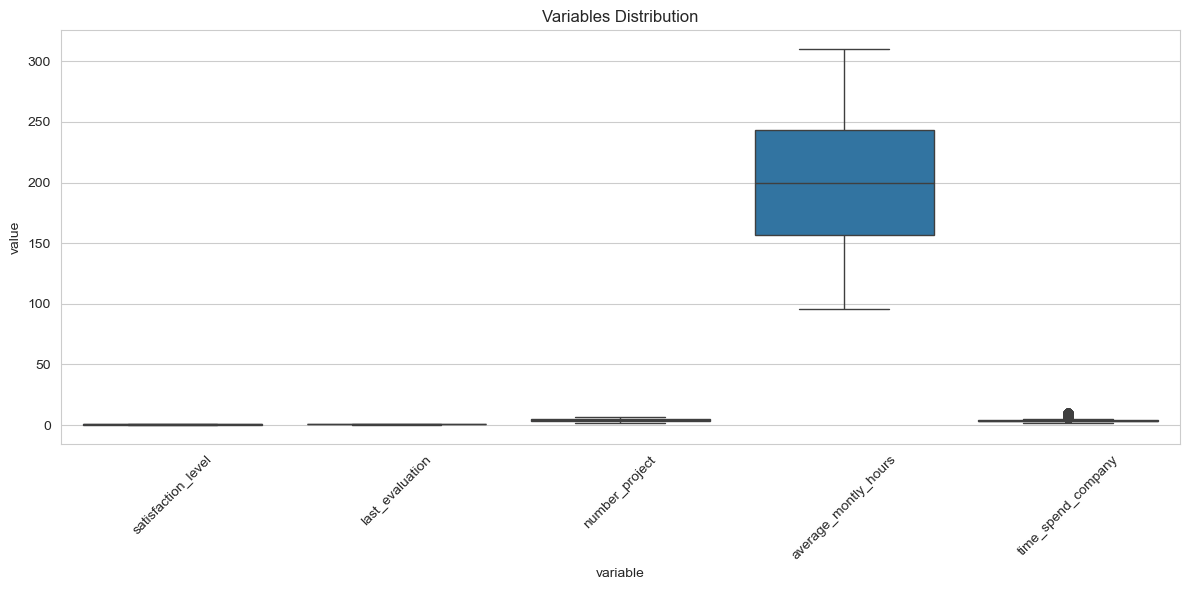

In [ ]:
# Visualizing potential outliers

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')

# Variables to check
variables = ['satisfaction_level', 'last_evaluation', 
           'number_project', 'average_montly_hours',
           'time_spend_company']

# Visualization configuration
plot_data = df1[variables].melt()
plt.figure(figsize=(12, 6))
sns.boxplot(data=plot_data, x='variable', y='value')
plt.title('Variables Distribution')
plt.xticks(rotation=45)

# Display plot
plt.tight_layout()
plt.show()

There's seems to be outliers in the tenure variable.

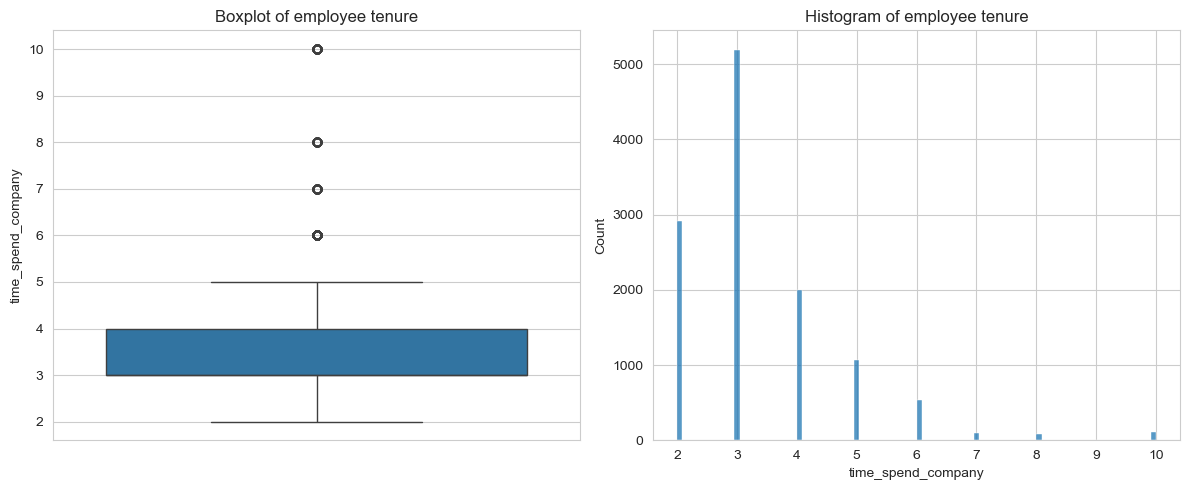

In [22]:
# Visualizing tenure variable distribution

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
sns.boxplot(data=df1, y='time_spend_company', ax=ax1)
ax1.set_title('Boxplot of employee tenure')

# Histogram
sns.histplot(data=df1, x='time_spend_company', ax=ax2)
ax2.set_title('Histogram of employee tenure')

# Dsiplat plot
plt.tight_layout()
plt.show()

In [29]:
# Detecting outliers in the tenure variable using IQR

# Calculate the IQR bounds once for the entire dataset
def detect_outliers_iqr(data, column):
    Q1 = np.quantile(data[column], 0.25)
    Q3 = np.quantile(data[column], 0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    
    # Create outlier flags
    outliers = (data[column] < lower) | (data[column] > upper)
    return outliers.astype(int)

# Apply the function
outliers = df1.copy()
outliers['outlier'] = detect_outliers_iqr(outliers, 'time_spend_company')
outliers = outliers[['time_spend_company', 'outlier']]
outliers.groupby('outlier').count()

,time_spend_company
outlier,
0,11167
1,824


There are 824 outliers in the time_spend_company variable. Certain types of models are more sensitive to outliers than others. The treatment of these outliers are need to be considered based on the type of model to use.

# pAce: Analyze Stage

In this step, we explore relationships between employee turnover and potential explanatory variables to identify patterns and trends.

## Data Exploration 

In [33]:
# Get numbers of people who left vs. stayed

left_employee = df1.groupby('left')['satisfaction_level'].count().reset_index()
left_employee = left_employee.rename(columns=({'satisfaction_level': 'count'}))
left_employee['percentage'] = (left_employee['count'] / left_employee['count'].sum()) * 100
left_employee

,left,count,percentage
0,0,10000,83.39588
1,1,1991,16.60412


### Data visualizations

### **Department and left vs stayed status**

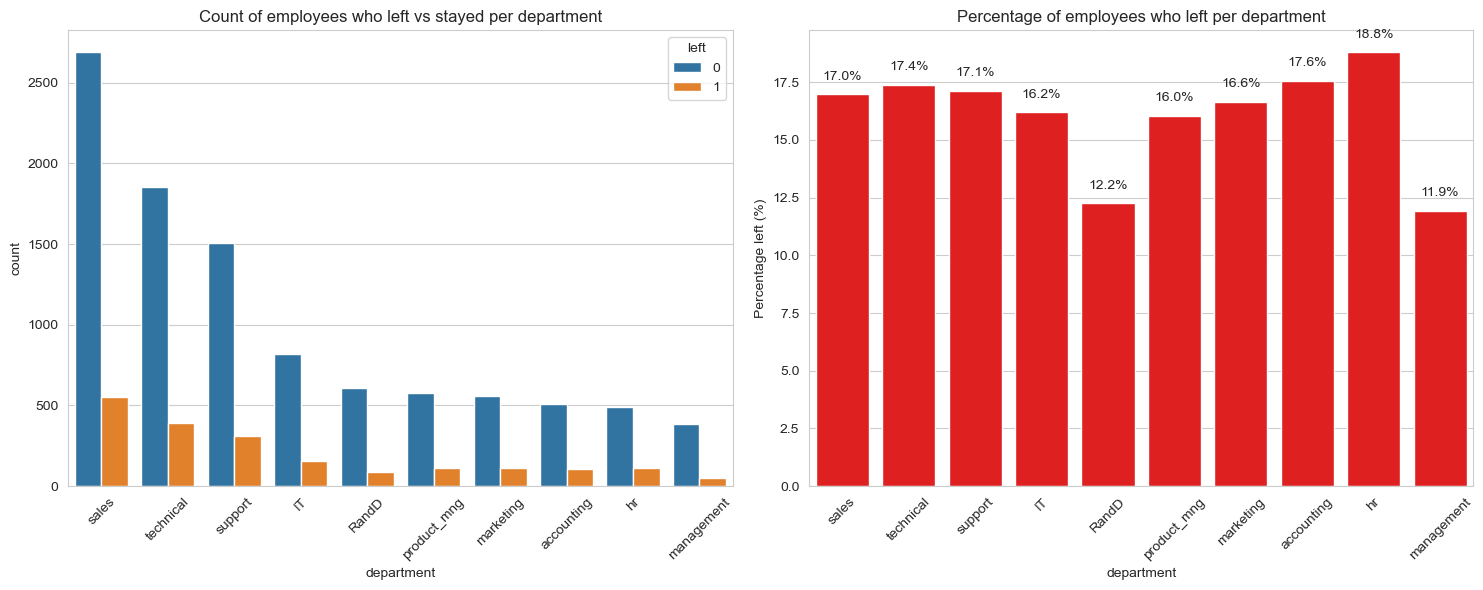

In [41]:
# Number of employees left per department

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
dept_order = df1['department'].value_counts().index # to sort by employees number per department

# Left plot: count plot
sns.countplot(data=df1, x='department', hue='left', ax=ax1, order=dept_order)
ax1.set_title('Count of employees who left vs stayed per department')
ax1.tick_params(axis='x', rotation=45)

# Right plot: percentage plot
left_percentages = df1.groupby('department')['left'].mean().loc[dept_order] * 100
sns.barplot(x=left_percentages.index, y=left_percentages.values, ax=ax2, color='red')
ax2.set_title('Percentage of employees who left per department')
ax2.set_ylabel('Percentage left (%)')
ax2.tick_params(axis='x', rotation=45)

# Add percentage labels on the right plot
for i, p in enumerate(ax2.patches):
    ax2.text(p.get_x() + p.get_width()/2, p.get_height() + 0.5,
            f'{p.get_height():.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

The analysis reveals department is not a significant factor in employee turnover. With all departments showing similar attrition rates between 16-17%, the data indicates turnover drivers are consistent across the organization. Focus should shift to another variables.

### **Salary group and left vs stayed status**

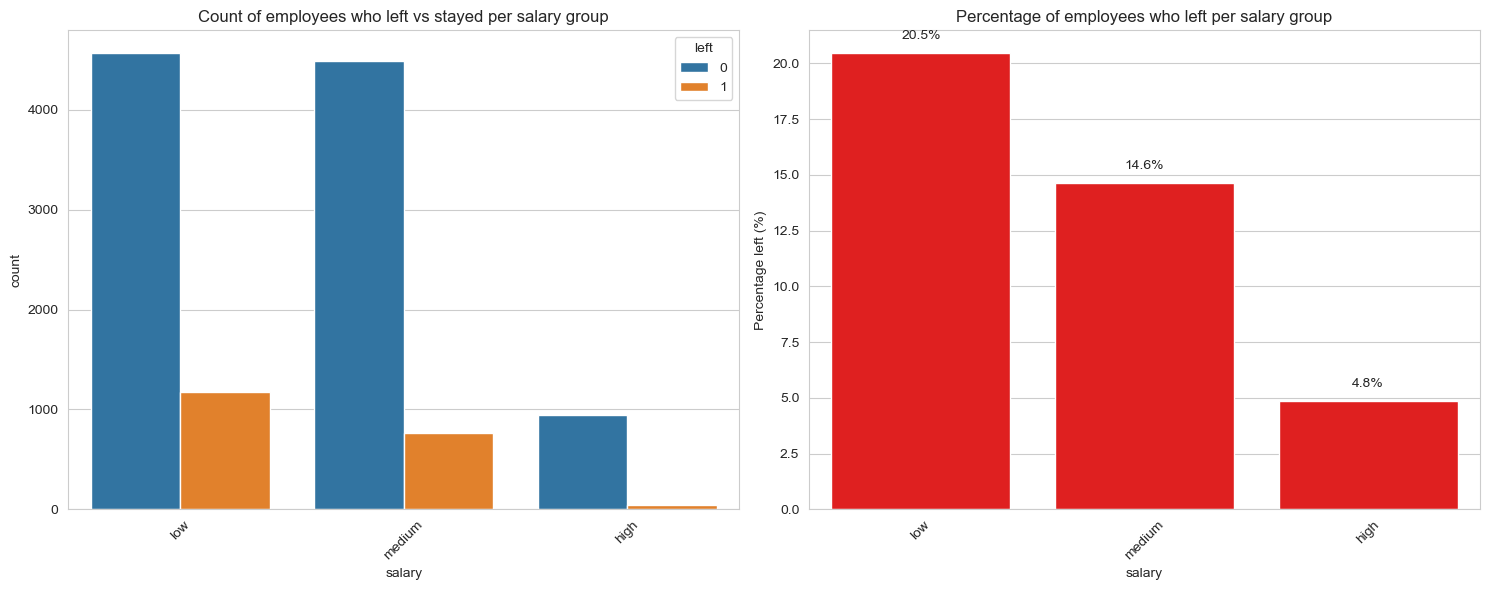

In [42]:
# Number of employees left per salary group

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
salary_order = df1['salary'].value_counts().index # to sort by employees number per salary group

# Left plot: count plot
sns.countplot(data=df1, x='salary', hue='left', ax=ax1, order=salary_order)
ax1.set_title('Count of employees who left vs stayed per salary group')
ax1.tick_params(axis='x', rotation=45)

# Right plot: percentage plot
left_percentages = df1.groupby('salary')['left'].mean().loc[salary_order] * 100
sns.barplot(x=left_percentages.index, y=left_percentages.values, ax=ax2, color='red')
ax2.set_title('Percentage of employees who left per salary group')
ax2.set_ylabel('Percentage left (%)')
ax2.tick_params(axis='x', rotation=45)

# Add percentage labels on the right plot
for i, p in enumerate(ax2.patches):
    ax2.text(p.get_x() + p.get_width()/2, p.get_height() + 0.5,
            f'{p.get_height():.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

Salary level has a dramatic impact on employee retention. Employees with low salaries leave at more than 4 times the rate of high-salary employees (20.5% vs 4.8%). This strong correlation suggests compensation is a critical factor in turnover decisions, making it a much stronger predictor than department affiliation.

### **Working hours and left vs stayed status**

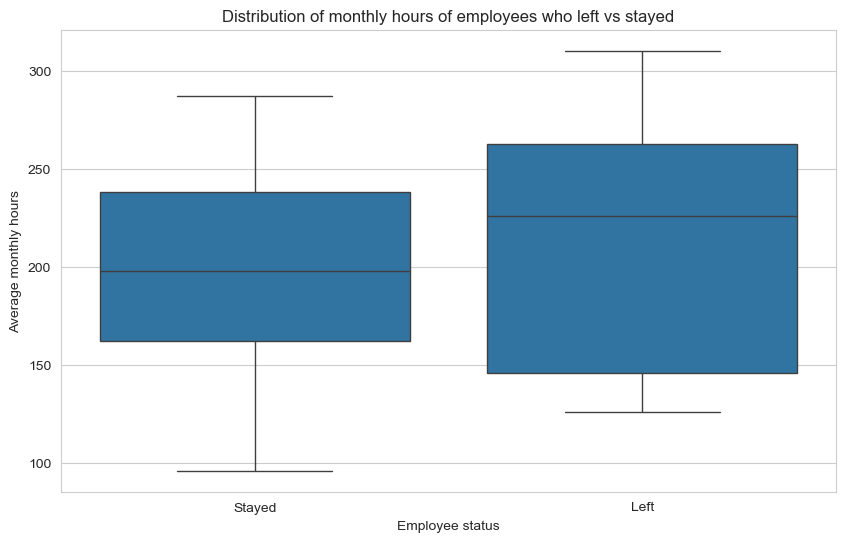

In [57]:
# Average working hours and employees turnover

plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='left', y='average_montly_hours')
plt.title('Distribution of monthly hours of employees who left vs stayed')
plt.xlabel('Employee status')
plt.ylabel('Average monthly hours')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.show()

In [54]:
# Average working hours and employees turnover

# Calculate statistics for both groups
monthly_hours = df1.groupby('left')['average_montly_hours'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

print("Monthly Hours by Turnover Status:")
print(monthly_hours)

# Calculate the difference
stayed_mean = monthly_hours.loc[0, 'mean']
left_mean = monthly_hours.loc[1, 'mean']
difference = left_mean - stayed_mean

print(f"\nDifference in average hours (Left - Stayed): {difference:.2f} hours")

Monthly Hours by Turnover Status:
      count    mean  median    std  min  max
left                                        
0     10000  198.94   198.0  45.67   96  287
1      1991  208.16   226.0  61.30  126  310

Difference in average hours (Left - Stayed): 9.22 hours


In [59]:
# T-test for statitical significance of differences

stayed_hours = df1[df1['left'] == 0]['average_montly_hours']
left_hours = df1[df1['left'] == 1]['average_montly_hours']

t_stat, p_value = stats.ttest_ind(left_hours, stayed_hours)
print(f"T-test: t-statistic = {t_stat:.3f}, p-value = {p_value:.4f}")

T-test: t-statistic = 7.729, p-value = 0.0000


Employees who left the company consistently worked longer hours than those who stayed, suggesting potential burnout or work-life balance issues may be driving turnover. This pattern indicates that excessive workload could be a significant factor in employee retention

### **Number of projects per employee and left vs stayed status**

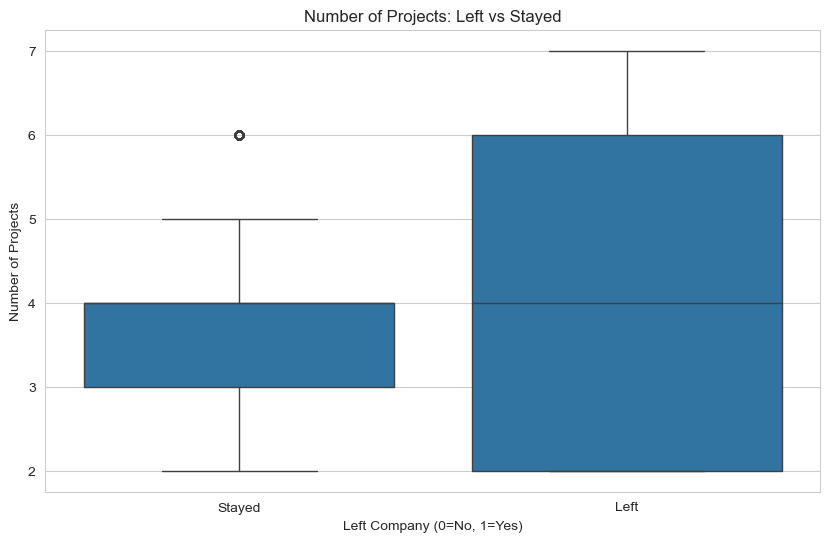

In [71]:
# Boxplot of number of projects by turnover status

plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='left', y='number_project')
plt.title('Number of Projects: Left vs Stayed')
plt.xlabel('Left Company (0=No, 1=Yes)')
plt.xticks([0, 1], ['Stayed', 'Left'])
plt.ylabel('Number of Projects')
plt.show()

In [72]:
# Calculate statistics for number of projects

projects_stats = df1.groupby('left')['number_project'].agg([
    'count', 'mean', 'median', 'std', 'min', 'max'
]).round(2)

print("Projects by Turnover Status:")
print(projects_stats)

Projects by Turnover Status:
      count  mean  median   std  min  max
left                                     
0     10000  3.79     4.0  0.98    2    6
1      1991  3.88     4.0  1.82    2    7


In [74]:
# Calculate exact turnover rates by project count

project_turnover = df1.groupby('number_project')['left'].agg(['count', 'sum', 'mean'])
project_turnover['turnover_rate'] = (project_turnover['mean'] * 100).round(1)
project_turnover = project_turnover.sort_index()

print("Exact Turnover Rates by Project Count:")
print(project_turnover[['count', 'sum', 'turnover_rate']])

Exact Turnover Rates by Project Count:
                count  sum  turnover_rate
number_project                           
2                1582  857           54.2
3                3520   38            1.1
4                3685  237            6.4
5                2233  343           15.4
6                 826  371           44.9
7                 145  145          100.0


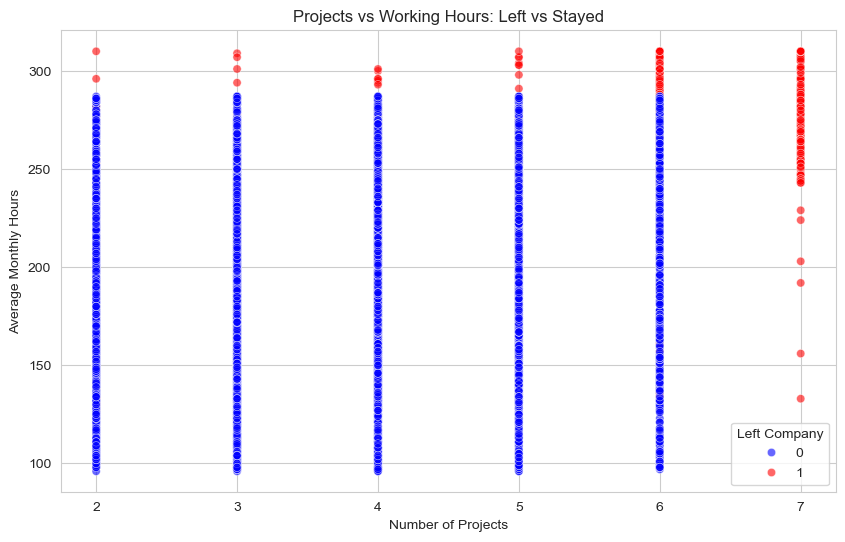

In [69]:
# Relationship between number of projects and working hours

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df1, x='number_project', y='average_montly_hours', 
                hue='left', alpha=0.6, palette={0: 'blue', 1: 'red'})
plt.title('Projects vs Working Hours: Left vs Stayed')
plt.xlabel('Number of Projects')
plt.ylabel('Average Monthly Hours')
plt.legend(title='Left Company')
plt.show()

Employees with only 2 projects leave at alarming rates (54%), likely due to underutilization and career stagnation. Meanwhile, the 7-project workload is completely unsustainable, resulting in 100% departure. The sweet spot is clearly 3 projects, which achieves near-perfect 1.1% retention. This single variable explains a massive portion of our turnover problem and provides immediately actionable solutions.

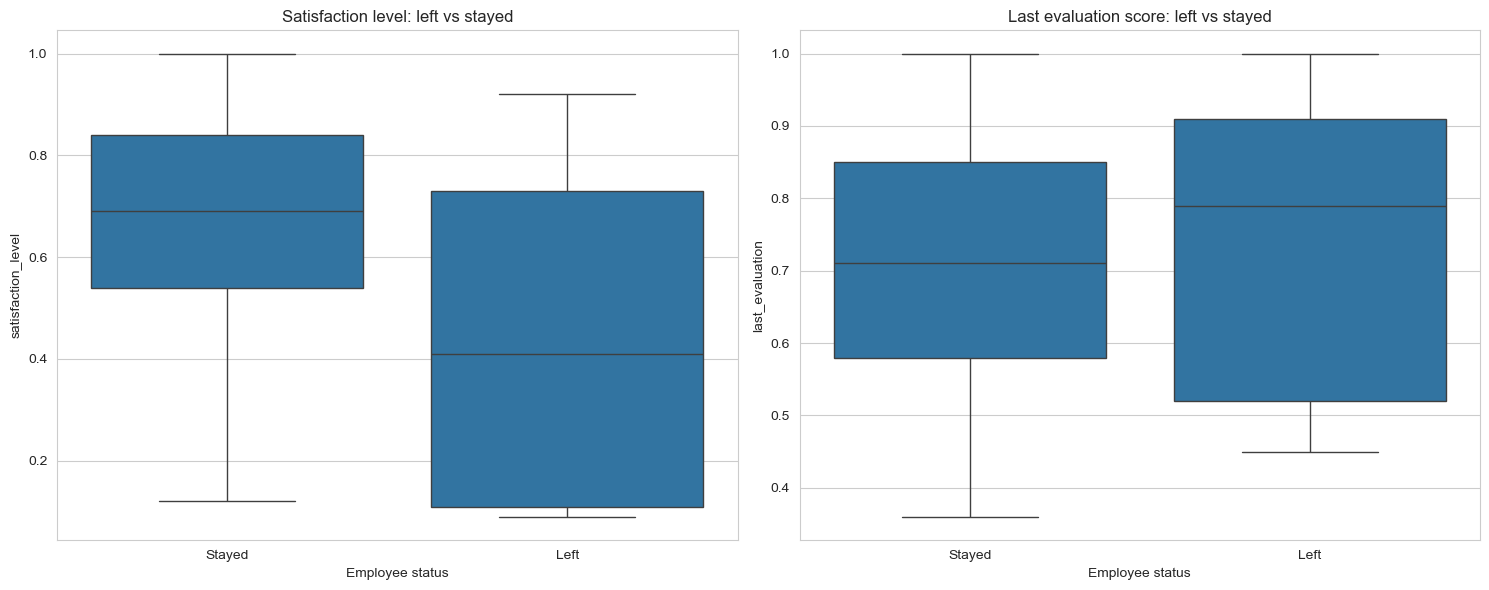

In [64]:
# Relationship between satisfaction and employee performance with employee status

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Satisfaction level
sns.boxplot(data=df1, x='left', y='satisfaction_level', ax=ax1)
ax1.set_title('Satisfaction level: left vs stayed')
ax1.set_xlabel('Employee status')
ax1.set_xticks([0, 1], ['Stayed', 'Left'])

# Last evaluation
sns.boxplot(data=df1, x='left', y='last_evaluation', ax=ax2)
ax2.set_title('Last evaluation score: left vs stayed')
ax2.set_xlabel('Employee status')
ax2.set_xticks([0, 1], ['Stayed', 'Left'])

plt.tight_layout()
plt.show()

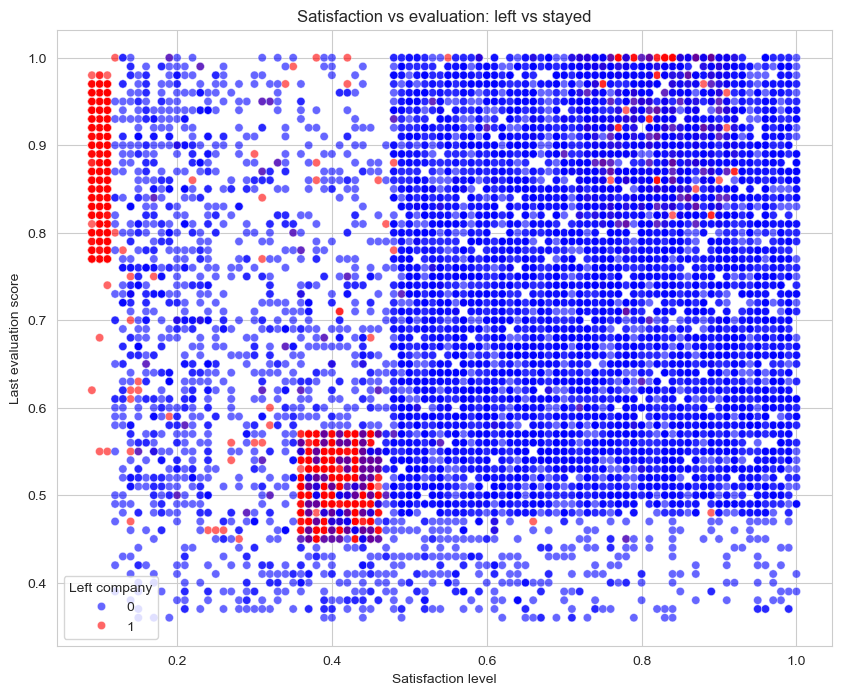

In [65]:
# Scatter plot for relationship

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df1, x='satisfaction_level', y='last_evaluation', 
                hue='left', alpha=0.6, palette={0: 'blue', 1: 'red'})
plt.title('Satisfaction vs evaluation: left vs stayed')
plt.xlabel('Satisfaction level')
plt.ylabel('Last evaluation score')
plt.legend(title='Left company')
plt.show()

In [66]:
# Quantify relationships

print("Average Satisfaction Level:")
print(f"Stayed: {df1[df1['left']==0]['satisfaction_level'].mean():.3f}")
print(f"Left: {df1[df1['left']==1]['satisfaction_level'].mean():.3f}")

print("\nAverage Evaluation Score:")
print(f"Stayed: {df1[df1['left']==0]['last_evaluation'].mean():.3f}") 
print(f"Left: {df1[df1['left']==1]['last_evaluation'].mean():.3f}")

Average Satisfaction Level:
Stayed: 0.667
Left: 0.440

Average Evaluation Score:
Stayed: 0.716
Left: 0.722


We're experiencing a classic talent drain scenario. High-performing employees with low satisfaction levels are the most likely to leave, representing our greatest retention risk. Meanwhile, employee satisfaction shows a strong protective effect - happy employees stay regardless of performance level. This suggests we're losing our best talent due to dissatisfaction, while managing to retain satisfied average performers

### **Insights**
- Project Allocation: Extreme workloads drive turnover
- 7 projects: 100% leave, 2 projects: 54% leave
- Sweet spot: 3 projects (only 1.1% turnover)
- Salary: Low salary employees leave at 4x rate (20.5% vs 4.8%)
- Working Hours: Employees who left worked significantly longer hours
- Satisfaction: Leavers had 34% lower satisfaction (0.44 vs 0.67)
- Talent Drain: High performers slightly more likely to leave

# paCe: Construct Stage

To predict employee turnover, multiple machine learning algorithms were developed and evaluated. The modeling process aimed to achieve two core objectives:
1. build a model with high predictive accuracy, and
2. ensure interpretability to support HR decision-making.

The workflow began by establishing a baseline model using Logistic Regression, a simple yet interpretable algorithm that provides a reference for evaluating more complex approaches. Logistic Regression’s coefficients offer insight into the direction and magnitude of each feature’s influence on turnover, serving as an intuitive benchmark.

After establishing the baseline, the analysis expanded to include tree-based ensemble models, namely Random Forest and XGBoost, to capture potential nonlinear relationships and complex feature interactions that linear models might miss. Ensemble methods are particularly effective for structured HR data, where multiple employee characteristics interact in non-additive ways.

### **Logistic Regression**

Create logistic regression for interpretable variable relationships.

In [100]:
# Data preparation (1): Removing outliers

# Create separate dataframe
df_logistic = df1.copy()

# Removing outliers from time_spend_company
outliers_only = outliers[outliers['outlier'] == 1]
outliers_mask = ~df_logistic['time_spend_company'].isin(outliers_only['time_spend_company']) 
df_logistic = df_logistic[outliers_mask]

# Checking filtered dataframe
print(f"Values to keep (non-outliers): {outliers_mask.sum()}")
print(f"Values to remove (outliers): {(~outliers_mask).sum()}")
print(f"Filtered data shape: {df_logistic.shape}")

Values to keep (non-outliers): 11167
Values to remove (outliers): 824
Filtered data shape: (11167, 10)



Correlation matrix of predictor variables):
                       satisfaction_level  ...  promotion_last_5years
satisfaction_level                  1.000  ...                  0.026
last_evaluation                     0.095  ...                 -0.002
number_project                     -0.133  ...                  0.005
average_montly_hours               -0.012  ...                 -0.009
time_spend_company                 -0.221  ...                 -0.011
work_accident                       0.044  ...                  0.026
promotion_last_5years               0.026  ...                  1.000

[7 rows x 7 columns]


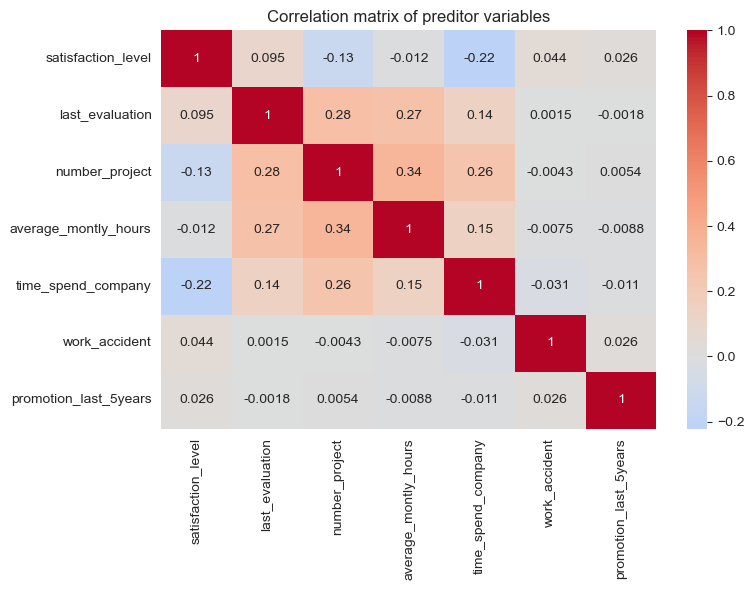


Complete Separation Check:
satisfaction_level: Stayed=89 unique, Left=81 unique
last_evaluation: Stayed=65 unique, Left=53 unique
number_project: Stayed=5 unique, Left=6 unique
average_montly_hours: Stayed=192 unique, Left=162 unique
time_spend_company: Stayed=4 unique, Left=4 unique
work_accident: Stayed=2 unique, Left=2 unique
promotion_last_5years: Stayed=2 unique, Left=2 unique


In [93]:
# Data preparation (2): Checking for multicolinearity among numerical features

# Check for multicollinearity among numerical variables
predictor_vars = ['satisfaction_level', 'last_evaluation', 
                  'number_project', 'average_montly_hours',
                  'time_spend_company', 'work_accident',
                  'promotion_last_5years']
print("\nCorrelation matrix of predictor variables):")
corr_matrix = df_logistic[predictor_vars].corr()
print(corr_matrix.round(3))

# Visualize correlations
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation matrix of preditor variables')
plt.tight_layout()
plt.show()

# Check for complete separation
print(f"\nComplete Separation Check:")
for var in predictor_vars:
    unique_vals = df_logistic.groupby('left')[var].nunique()
    print(f"{var}: Stayed={unique_vals[0]} unique, Left={unique_vals[1]} unique")

In [101]:
# Data preparation (3): One hot encoding for categorical feature

# Identifying categorical features
categorical_features = ['salary', 'department']

# Apply OneHotEncoder to categorical features
encoder = OneHotEncoder(drop='first', sparse_output=False)
cat_encoded = encoder.fit_transform(df_logistic[categorical_features])
cat_feature_names = encoder.get_feature_names_out(categorical_features)

# Create DataFrame with encoded features and add to main dataframe
cat_encoded_df = pd.DataFrame(cat_encoded, columns=cat_feature_names, index=df_logistic.index)
df_logistic = pd.concat([df_logistic, cat_encoded_df], axis=1)
df_logistic = df_logistic.drop(['department', 'salary'], axis=1)

# Display the new columns added
df_logistic.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary_low,salary_medium,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.11,0.88,7,272,4,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.72,0.87,5,223,5,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.37,0.52,2,159,3,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.41,0.50,2,153,3,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Checking final data information

df_logistic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11167 entries, 0 to 11999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   satisfaction_level      11167 non-null  float64
 1   last_evaluation         11167 non-null  float64
 2   number_project          11167 non-null  int64  
 3   average_montly_hours    11167 non-null  int64  
 4   time_spend_company      11167 non-null  int64  
 5   work_accident           11167 non-null  int64  
 6   left                    11167 non-null  int64  
 7   promotion_last_5years   11167 non-null  int64  
 8   salary_low              11167 non-null  float64
 9   salary_medium           11167 non-null  float64
 10  department_RandD        11167 non-null  float64
 11  department_accounting   11167 non-null  float64
 12  department_hr           11167 non-null  float64
 13  department_management   11167 non-null  float64
 14  department_marketing    11167 non-null  flo

In [106]:
# Verify the encoding makes sense

# Check what your reference categories are
print("Reference categories:")
print("Salary reference (all zeros): high salary") 
print("Department reference (all zeros):", encoder.categories_[1][0])  # First department

# Verify salary encoding makes sense
print("\nSalary encoding interpretation:")
print("salary_low = 1 → low salary (vs high)")
print("salary_medium = 1 → medium salary (vs high)") 
print("Both zeros → high salary (reference)")

# Check counts
total_employees = len(df_logistic)
high_salary_count = total_employees - (5429 + 4854)
print(f"\nSalary distribution:")
print(f"High salary (reference): {high_salary_count}")
print(f"Low salary: 5429")
print(f"Medium salary: 4854")

# Verify department encoding
dept_cols = [col for col in df_logistic.columns if col.startswith('department_')]
reference_dept_count = (df_logistic[dept_cols].sum(axis=1) == 0).sum()
print(f"\nDepartment in reference category: {reference_dept_count} employees")

Reference categories:
Salary reference (all zeros): high salary
Department reference (all zeros): IT

Salary encoding interpretation:
salary_low = 1 → low salary (vs high)
salary_medium = 1 → medium salary (vs high)
Both zeros → high salary (reference)

Salary distribution:
High salary (reference): 884
Low salary: 5429
Medium salary: 4854

Department in reference category: 915 employees


In [110]:
# Logistic regression fitting

# Prepare features and target
feature_columns = [
    'satisfaction_level', 'last_evaluation', 'number_project',
    'average_montly_hours', 'time_spend_company', 'work_accident',
    'promotion_last_5years', 'salary_low', 'salary_medium'
] + dept_cols # referencing from previous code block

X = df_logistic[feature_columns]
y = df_logistic['left']

# Add constant
X = sm.add_constant(X)

# Fit logistic regression
model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.317285
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                   left   No. Observations:                11167
Model:                          Logit   Df Residuals:                    11148
Method:                           MLE   Df Model:                           18
Date:                Sat, 01 Nov 2025   Pseudo R-squ.:                  0.3004
Time:                        16:08:59   Log-Likelihood:                -3543.1
converged:                       True   LL-Null:                       -5064.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.8100      0.260    -10.811      0.000      -3.319      

This analysis reveals that **employee satisfaction** is the most powerful retention lever, while **tenure** and **compensation inequity** represent the most significant risk factors. Notably, **department affiliation shows no meaningful impact** on turnover decisions, indicating organization-wide patterns rather than localized issues.

**Critical Risk Factors**

1. Employee Satisfaction
- **Coefficient**: -4.56 (p < 0.001)
- **Impact**: Each 0.1-point increase reduces turnover odds by **37%**
- **Interpretation**: The single most powerful protective factor against turnover

2. Tenure at Company  
- **Coefficient**: 1.07 (p < 0.001)
- **Impact**: Each additional year **triples turnover odds** (+191%)
- **Interpretation**: Longer-tenured employees are significantly more likely to leave

3. Compensation Level
- **Low Salary Impact**: **5x more likely** to leave vs high salary (+391%)
- **Medium Salary Impact**: **3x more likely** to leave vs high salary (+232%)
- **Interpretation**: Severe compensation inequity is driving disproportionate turnover

4. Workload & Safety Factors
- **Project Load**: Each additional project reduces turnover by **38%**
- **Workplace Safety**: Employees with accident history are **78% less likely** to leave
- **Interpretation**: Engagement and safety culture significantly improve retention

5. Career Advancement
- **Coefficient**: -1.03 (p = 0.012)
- **Impact**: Promoted employees are **64% less likely** to leave
- **Interpretation**: Career growth opportunities strongly retain talent

### **Tree-based Modeling**

While Logistic Regression served as a solid baseline, its linear assumptions limited its ability to capture the complex relationships that likely influence employee turnover. Employee decisions to leave are rarely driven by a single factor; rather, they emerge from interactions among multiple variables, such as low satisfaction combined with long tenure or limited promotion opportunities.

To better model these nonlinear patterns and feature interactions, the analysis progressed to tree-based ensemble methods, specifically Random Forest and XGBoost. These models aggregate decisions from multiple trees to improve predictive accuracy and robustness, making them well-suited for high-dimensional HR datasets.

This next step allows for a more nuanced understanding of turnover behavior while maintaining the interpretability necessary for HR stakeholders, especially when complemented with post-hoc explainability tools like SHAP.

In [117]:
# Data preparation (1): Splitting data

# Getting original data for tree-based modeling
df_tree = df1.copy()

# Splitting predictor and target variables
X = df_tree.drop(columns='left')
y = df_tree['left']

# Test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

# Checking all data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8993, 9)
(2998, 9)
(8993,)
(2998,)


In [118]:
# Encode categorical data in predictor variables

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# Checking encoded data
print(X_train.head(5))
print(X_test.head(5))

      satisfaction_level  last_evaluation  ...  salary_low  salary_medium
984                 0.75             0.86  ...        True          False
610                 0.09             0.95  ...       False           True
7033                0.68             0.61  ...       False           True
6411                0.59             0.75  ...       False           True
8388                0.59             0.79  ...       False           True

[5 rows x 20 columns]
       satisfaction_level  last_evaluation  ...  salary_low  salary_medium
11098                0.69             0.83  ...       False           True
5472                 0.19             0.64  ...       False           True
7367                 0.79             0.78  ...       False           True
3605                 0.73             0.81  ...        True          False
3248                 0.76             0.62  ...       False           True

[5 rows x 20 columns]


In [121]:
# Random forest modeling

# Instantiate the model
rf = RandomForestClassifier(random_state=42)

# Create a dictionary of hyperparameters to tune 
rf_params = {
    'n_estimators': [100, 150, 200],             
    'max_depth': [5, 10, None],             
    'min_samples_split': [2, 5],            
    'min_samples_leaf': [1, 2],             
    'max_features': ['sqrt', 0.2, 0.3]      
}

# Define a list of scoring metrics to capture
rf_scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, rf_params, scoring=rf_scoring, cv=5, refit='f1', n_jobs=-1, verbose=2)

In [122]:
# Training
%time

rf_cv.fit(X_train, y_train)

CPU times: user 8 μs, sys: 74 μs, total: 82 μs
Wall time: 1.01 ms
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   2.5s
[CV] END max_depth=5, max_features=sqr

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [5, 10, ...], 'max_features': ['sqrt', 0.2, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,scoring,"['accuracy', 'precision', ...]"
,n_jobs,-1
,refit,'f1'
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [123]:
# Saving the model

# Model path
path = '/Users/bangkitwiguna/Documents/Coding Scripts/Python/Capstone Project/'

# Saving function
def write_pickle(path, model_object, save_name:str):
    '''
    save_name is a string.
    '''
    with open(path + save_name + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

# Saving 
write_pickle(path, rf_cv, 'random_forest_salifort')

In [ ]:
# Read the model

# Helper function to read

def read_pickle(path, saved_model_name:str):
    '''
    saved_model_name is a string.
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

        return model
    
# Loading saved model
# read_pickle(path, 'random_forest_nyc.pickle')

In [124]:
# Examine the best score

rf_cv.best_score_

np.float64(0.9491715356138961)

In [126]:
# Examine best parameter

rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [127]:
# Get the best results in table

# Instantiate helper function
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
    model_name (string): what you want the model to be called in the output table
    model_object: a fit GridSearchCV object
    metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'precision': 'mean_test_precision',
                 'recall': 'mean_test_recall',
                 'f1': 'mean_test_f1',
                 'accuracy': 'mean_test_accuracy',
                 }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy],
                        },
                       )

    return table


# Getting and showing results

rf_results = make_results('Salifort Random Forest (GridSearch 5 CV)', rf_cv, 'f1')
rf_results

,model,precision,recall,F1,accuracy
0,Salifort Random Forest (GridSearch 5 CV),0.987715,0.913589,0.949172,0.983765


In [128]:
# XGBoost modeling

# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# Create a dictionary of hyperparameters to tune
xgb_params = {
    'max_depth': [4, 6, 8],           
    'min_child_weight': [1, 3, 5],     
    'learning_rate': [0.05, 0.1, 0.2], 
    'n_estimators': [100, 150, 200],   
    'subsample': [0.8, 1.0],           
    'colsample_bytree': [0.8, 1.0]    
}

# Define a list of scoring metrics to capture
xgb_scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, xgb_params, scoring=xgb_scoring, cv=5, refit='f1', n_jobs=-1, verbose=2)

In [129]:
# Training
%time

xgb_cv.fit(X_train, y_train)

CPU times: user 3 μs, sys: 12 μs, total: 15 μs
Wall time: 16 μs
Fitting 5 folds for each of 324 candidates, totalling 1620 fits


python(54961) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(54962) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(54963) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(54964) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(54965) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(54966) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(54967) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
python(54968) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.0

,estimator,"XGBClassifier...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.8, 1.0], 'learning_rate': [0.05, 0.1, ...], 'max_depth': [4, 6, ...], 'min_child_weight': [1, 3, ...], ...}"
,scoring,"['accuracy', 'precision', ...]"
,n_jobs,-1
,refit,'f1'
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'binary:logistic'


In [130]:
# Saving XGBoost model

write_pickle(path, xgb_cv, 'xgboost_salifort')

In [131]:
# XGBoost best score

xgb_cv.best_score_

np.float64(0.9499120326082613)

In [132]:
# XGBoost best parameter

xgb_cv.best_params_

{'colsample_bytree': 1.0,
 'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 1,
 'n_estimators': 100,
 'subsample': 1.0}

In [133]:
# Getting XGBoost results

xgb_results = make_results('Salifort XGBoost (GridSearch 5 CV)', xgb_cv, 'f1')
xgb_results

,model,precision,recall,F1,accuracy
0,Salifort XGBoost (GridSearch 5 CV),0.980791,0.920958,0.949912,0.983876


In [134]:
# Comparing two model

final_results = pd.concat([rf_results, xgb_results])
final_results

,model,precision,recall,F1,accuracy
0,Salifort Random Forest (GridSearch 5 CV),0.987715,0.913589,0.949172,0.983765
0,Salifort XGBoost (GridSearch 5 CV),0.980791,0.920958,0.949912,0.983876


After rigorous evaluation of both Random Forest and XGBoost, XGBoost is selected as our production model for employee turnover prediction. While both models demonstrated exceptional performance, XGBoost's superior recall, accuracy, and F1-score provides critical business value by capturing more actual turnover cases, making it the optimal choice for proactive retention strategies.

# pacE: Execute Stage
- Evaluating champion model (XGBoost) using test data



In [135]:
# Getting champion model prediction

y_preds = xgb_cv.best_estimator_.predict(X_test)

In [136]:
# Get scores on test data

# Helper function for getting test data prediction score
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
    model_name (string): Your choice: how the model will be named in the output table
    preds: numpy array of test predictions
    y_test_data: numpy array of y_test data

    Out:
    table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                        'precision': [precision],
                        'recall': [recall],
                        'F1': [f1],
                        'accuracy': [accuracy]
                        })

    return table

test_scores = get_test_scores('XGBoost Salifort (Test Data)', y_preds, y_test)
test_scores

,model,precision,recall,F1,accuracy
0,XGBoost Salifort (Test Data),0.980851,0.925703,0.952479,0.984656


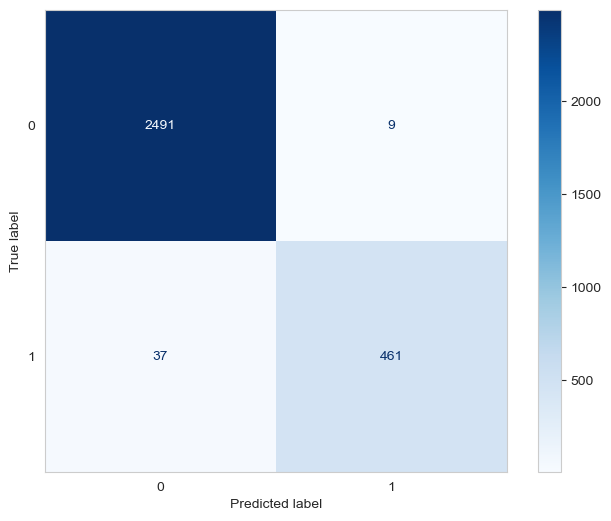

In [139]:
# Create a confusion matrix to visualize the results of the classification model

# Confusion matrix helper function
def conf_matrix_plot(model, x_data, y_data):
    '''
    Accepts as argument model object, X data (test or validate), and y data (test or validate). 
    Returns a plot of confusion matrix for predictions on y data.
    ''' 
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
    
    # Plot without grid lines
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(ax=ax, cmap='Blues')
    ax.grid(False)  # Remove grid lines
    plt.show()

# Plot confusion matrix
conf_matrix_plot(xgb_cv, X_test, y_test)

In [138]:
# Classification report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2500
           1       0.98      0.93      0.95       498

    accuracy                           0.98      2998
   macro avg       0.98      0.96      0.97      2998
weighted avg       0.98      0.98      0.98      2998



### **Model Evaluation**

The final XGBoost model demonstrates strong generalization performance on unseen test data, achieving 98.5% overall accuracy. It successfully identifies most employees likely to leave, with a recall of 0.93 and precision of 0.98 for the turnover class. This indicates that the model rarely misses true turnover cases (low false negatives) while keeping false alarms minimal.

The confusion matrix confirms this balance, out of nearly 3,000 test samples, only a small number of departures were misclassified as non-turnover cases (37 instances). These results suggest that the model captures key behavioral and employment-related patterns driving employee retention and exits, making it suitable as a decision-support tool for proactive HR interventions.

<Figure size 1000x800 with 0 Axes>

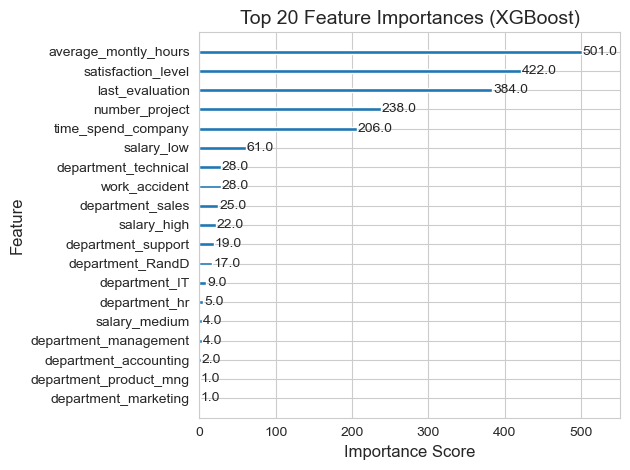

In [140]:
# XGBoost feature importance

plt.figure(figsize=(10, 8))
plot_importance(
    xgb_cv.best_estimator_, 
    max_num_features=20,   # show top 20 features
    importance_type='weight',  # 'weight', 'gain', or 'cover'
)

plt.title('Top 20 Feature Importances (XGBoost)', fontsize=14)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

Feature Importance (XGBoost): What drives the model most?
1. The top predictors of employee turnover are average monthly hours, satisfaction level, last evaluation, number of projects, and time spent at the company.
2. These variables dominate the model’s decision-making process, indicating that workload, employee satisfaction, and performance evaluation patterns are the most critical in determining whether employees are likely to leave.
3. Department-related and salary-tier features, such as salary_low, department_sales, department_technical, show smaller contributions, suggesting that turnover is more behaviorally driven than structurally determined by position or department.

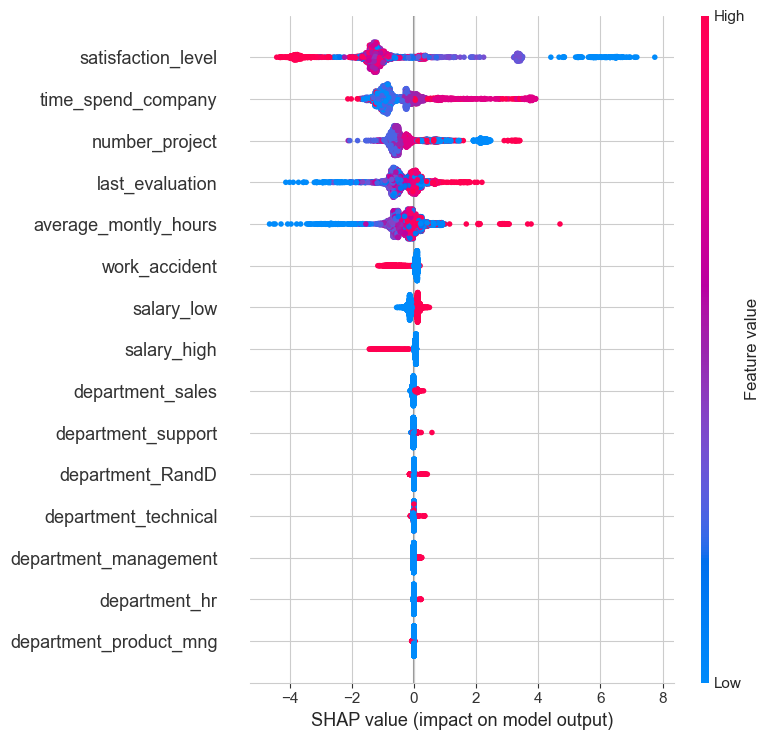

In [143]:
# SHAP

# Get the booster
booster = xgb_cv.best_estimator_.get_booster()

# Calculate SHAP values using XGBoost's built-in method
shap_vals = booster.predict(xgboost.DMatrix(X_test), pred_contribs=True)

# Remove the last column (base value) if present
if shap_vals.shape[1] == X_test.shape[1] + 1:
    shap_vals = shap_vals[:, :-1]

shap.summary_plot(shap_vals, X_test, max_display=15)

SHAP Summary Plot: How each feature influences predictions?
1. Low satisfaction level (blue points shifted right) strongly increases the likelihood of turnover, showing that employees with lower satisfaction scores are more prone to leave. Conversely, high satisfaction (red points on the left) reduces turnover risk, confirming that job satisfaction is a strong protective factor against attrition.
2. High time spent in the company (red on right) and high number of projects also raise the likelihood of turnover, possibly due to burnout or stagnation effects.
3. Average monthly hours show a nonlinear effect: extremely high working hours correlate with turnover (red dots on the right side), reflecting overwork or dissatisfaction.
4. High last evaluation scores are surprisingly associated with higher turnover risk, implying that top performers may feel overworked or under-rewarded and thus more likely to exit.
5. Conversely, work accident and salary_high contribute negatively to turnover predictions, employees who earn more or recently experienced an accident are less likely to leave.

## **Conclusion, Recommendations, Next Steps**

The predictive modeling process for employee turnover at Salifort Motors demonstrates that data-driven approaches can meaningfully support HR decision-making. The final XGBoost model achieved an accuracy of 0.98 and an F1-score of 0.95, indicating excellent balance between precision and recall. This means the model can reliably identify employees at risk of leaving while minimizing false alarms.

Key Drivers of Turnover:
1. Both feature importance and SHAP analysis reveal consistent behavioral and workplace patterns behind employee attrition:
2. Low satisfaction level is the strongest predictor of turnover, confirming that disengagement is the most direct signal of intent to leave.
3. High average monthly hours and long tenure also raise turnover risk, suggesting that overwork and prolonged stagnation may lead to burnout or dissatisfaction.
4. Low performance evaluations or few completed projects are less associated with leaving, implying that high-performing employees, those with strong evaluations but excessive workloads, are actually more likely to quit.
5. Salary level matters only marginally; low pay slightly increases turnover likelihood, but job satisfaction and workload pressure are stronger motivators for leaving.
6. Work accidents and departmental affiliation play minor but interpretable roles, employees who have experienced accidents tend to stay longer, and technical or support staff show higher stability than management or R&D roles.

Strategic Implications for HR Policy
These insights highlight the need for preventive retention strategies focused on workload management and employee engagement, rather than only financial incentives:
1. Balance workload and recognition: Monitor monthly working hours and align project assignments with capacity and recognition mechanisms to reduce burnout among high performers.
2. Prioritize engagement initiatives: Regular satisfaction surveys and proactive managerial check-ins can identify early signs of disengagement before resignation occurs.
3. Targeted retention programs: Use predictive outputs to identify at-risk groups and implement tailored interventions (e.g., flexible scheduling, growth opportunities, or peer mentoring).